### Assignment 2 - Weather

Task: With data from weatherreadings.csv, create a plot of the temperature over time (column "dryBulbTemperature_Celsius")

#### Importing modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

#### Loading dataset

In [2]:
FILENAME= "weatherreadings.csv"
DATADIR = "../pfda_assignments/"

df = pd.read_csv(DATADIR + FILENAME, header=0)
df.head(5)

,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:15:00+00:00,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:45:00+00:00,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:00:00+00:00,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:15:00+00:00,2024-10-02T17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,...,False,-8.8545,53.5244,45,20241002h49q6thyhre69kyhyytrtenn4a,2024-10-02T17:15:00+00:00,1000013318,2024-10-02T17:15:22.2638326+00:00,1,12577622149
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:30:00+00:00,2024-10-02T17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,...,False,-8.8545,53.5244,45,20241002977ft1hyhce69kyhyytrtenn4a,2024-10-02T17:30:00+00:00,1000013318,2024-10-02T17:30:29.3915476+00:00,1,12577636922


#### Information about dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   siteId                          89 non-null     object 
 1   reportStartDateTime             89 non-null     object 
 2   reportEndDateTime               89 non-null     object 
 3   collectionName                  89 non-null     int64  
 4   isPublic                        89 non-null     bool   
 5   isLatestVersion                 89 non-null     bool   
 6   observationType                 89 non-null     int64  
 7   softwareType                    89 non-null     object 
 8   windDirection                   89 non-null     int64  
 9   relativeHumidity                89 non-null     float64
 10  windSpeed_MilePerHour           89 non-null     float64
 11  windSpeed_MetrePerSecond        89 non-null     float64
 12  dryBulbTemperature_Fahrenheit   89 non

#### Converting string objects of 'reportStartDateTime' column into datetime series

In [4]:
df['reportStartDateTime'] = pd.to_datetime(df['reportStartDateTime'], yearfirst=True)
df['reportStartDateTime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 89 entries, 0 to 88
Series name: reportStartDateTime
Non-Null Count  Dtype              
--------------  -----              
89 non-null     datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 844.0 bytes


#### Setting 'reportStartDateTime' column as index of dataframe

In [5]:
df.set_index('reportStartDateTime', inplace=True)
df.head(3)

,siteId,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,windSpeed_MilePerHour,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
reportStartDateTime,,,,,,,,,,,,,,,,,,,,,
2024-10-02 16:15:00+00:00,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,3.06,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
2024-10-02 16:45:00+00:00,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,2.81,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2024-10-02 17:00:00+00:00,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,2.56,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947


In [6]:
df.index[0]

Timestamp('2024-10-02 16:15:00+0000', tz='UTC')

In [7]:
df.index[88]

Timestamp('2024-10-03 15:00:00+0000', tz='UTC')

Timestamps are in the format YYYY-MM-DD HH:MM:SS or ISO8601 format.

https://en.wikipedia.org/wiki/ISO_8601

#### Plot

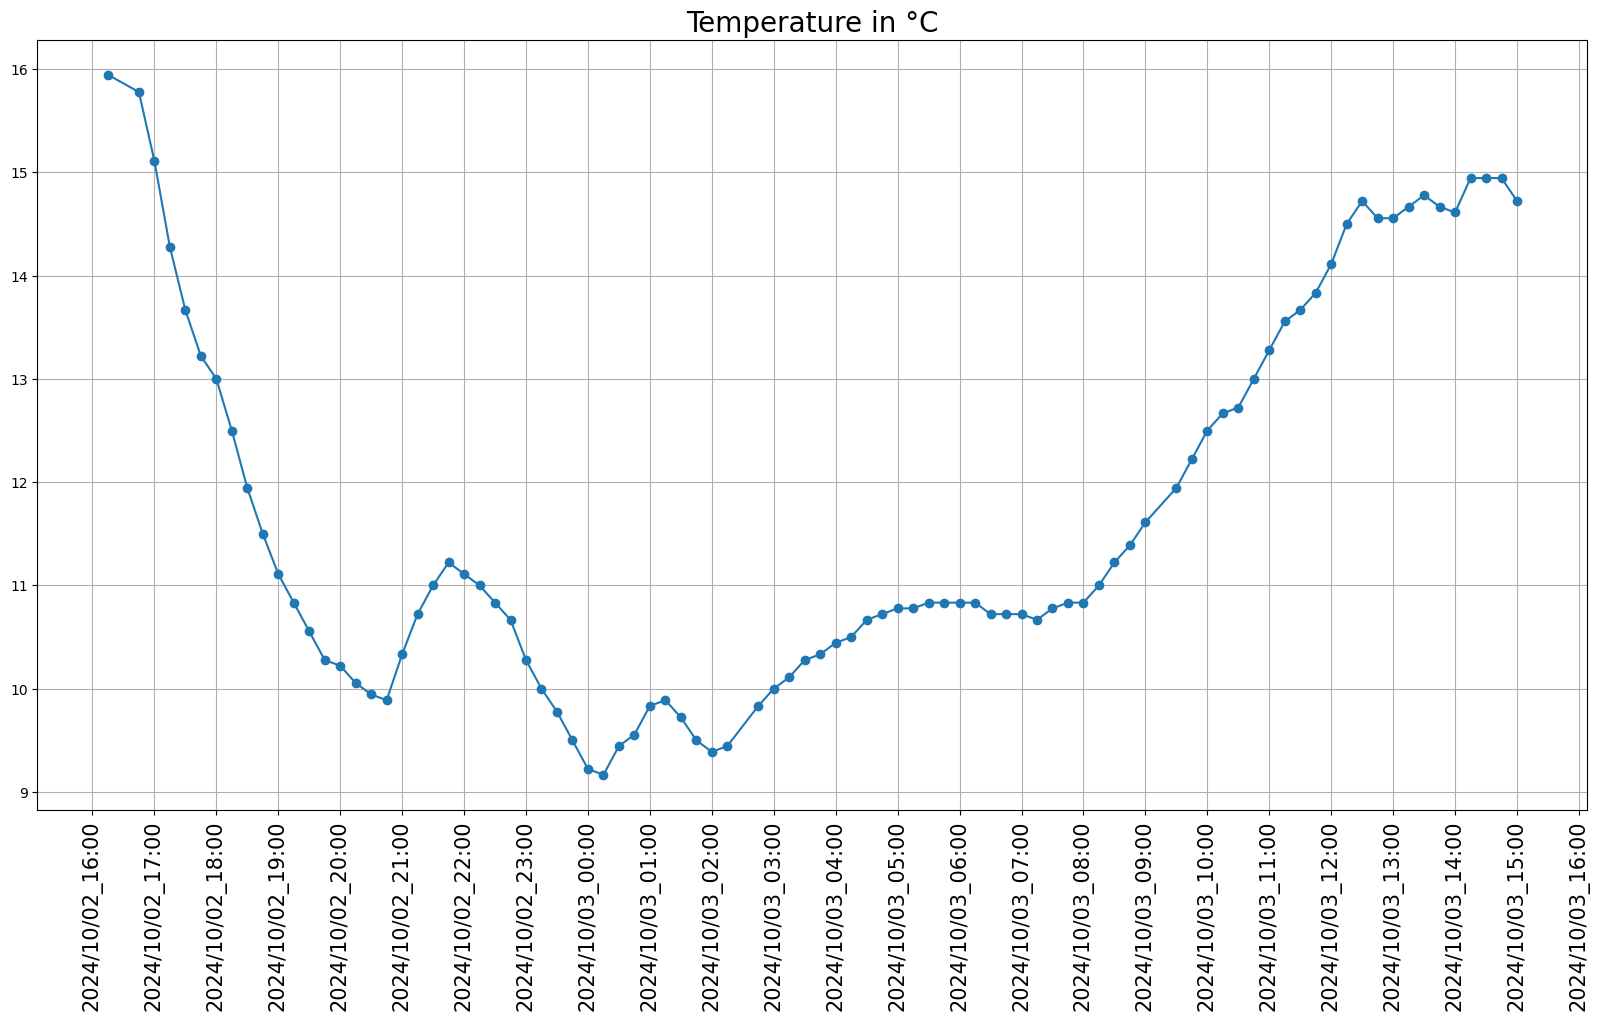

In [8]:
fig, ax=plt.subplots(figsize=(20,10)) 
font= {'size': 20}
x=df.index
y=df['dryBulbTemperature_Celsius']
ax.plot(x,y, marker='o')
ax.set_title('Temperature in °C', fontdict=font)
ax.grid(visible=True)
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d_%H:%M'))
ax.xaxis.set_tick_params(rotation=90, labelsize=15, )

***
### End